In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datatattle/covid-19-nlp-text-classification")

print("Path to dataset files:", path)

100%|██████████| 4.38M/4.38M [00:00<00:00, 46.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/datatattle/covid-19-nlp-text-classification/versions/1


In [ ]:
!cp -a /root/.cache/kagglehub/datasets/datatattle/covid-19-nlp-text-classification/versions/1/. /content/

In [ ]:
import pandas as pd

train_data = pd.read_csv('Corona_NLP_train.csv', encoding='latin-1')
test_data = pd.read_csv('Corona_NLP_test.csv', encoding='latin-1')
train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
train_data.shape

(41157, 6)

In [ ]:
train_data['Sentiment'].value_counts()

,count
Sentiment,
Positive,11422
Negative,9917
Neutral,7713
Extremely Positive,6624
Extremely Negative,5481


In [ ]:
import numpy as np

t = np.pow(train_data['Sentiment'].value_counts().values, 1/2)
D = np.triu(t.reshape(-1, 1) @ t.reshape(1, -1), 1)
D.sum(), t.sum()

(np.float64(80538.03597156797), np.float64(449.70331546824946))

In [ ]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
y = label.fit_transform(train_data['Sentiment'])
y[:5]

array([3, 4, 4, 4, 0])

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, train_size=450, random_state=42)
trix, valix = next(sss.split(train_data, y))
train_data['Sentiment'].iloc[trix].value_counts()

,count
Sentiment,
Positive,125
Negative,109
Neutral,84
Extremely Positive,72
Extremely Negative,60


In [ ]:
label.fit_transform(['Positive', 'Extremely Positive', 'Neutral', 'Negative', 'Extremely Negative'])

array([4, 1, 3, 2, 0])

In [ ]:
pmask = train_data['Sentiment'].values[trix] == 'Positive'
epmask = train_data['Sentiment'].values[trix] == 'Extremely Positive'
neumask = train_data['Sentiment'].values[trix] == 'Neutral'
nmask = train_data['Sentiment'].values[trix] == 'Negative'
enmask = train_data['Sentiment'].values[trix] == 'Extremely Negative'

In [ ]:
pmask.sum(), epmask.sum(), neumask.sum(), nmask.sum(), enmask.sum()

(np.int64(125), np.int64(72), np.int64(84), np.int64(109), np.int64(60))

In [ ]:
from itertools import product

data = (enmask, epmask, nmask, neumask, pmask)
res = []
resy = []
for i in range(len(data)):
  for j in range(i + 1, len(data)):
    for sk, sl in product(train_data['OriginalTweet'].values[trix][data[i]], train_data['OriginalTweet'].values[trix][data[j]]):
      res.append('. '.join([sk, sl]))
      resy.append(np.random.choice([i, j]))

In [ ]:
len(res)

79577

In [ ]:
!pip install tqdm boto3 requests regex sentencepiece sacremoses

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 8.9 MB/s eta 0:00:00


In [ ]:
import torch
tokenizer = torch.hub.load('huggingface/pytorch-transformers', 'tokenizer', 'bert-base-cased')

text_1 = "Who was Jim Henson ?"
text_2 = "Jim Henson was a puppeteer"

# Tokenized input with special tokens around it (for BERT: [CLS] at the beginning and [SEP] at the end)
indexed_tokens = tokenizer.encode(text_1, text_2, add_special_tokens=True)

/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/huggingface/pytorch-transformers/zipball/main" to /root/.cache/torch/hub/main.zip
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://hu

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
type(tokenizer.encode(text_1, add_special_tokens=True))

list

In [ ]:
# Define sentence A and B indices associated to 1st and 2nd sentences (see paper)
segments_ids = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

# Convert inputs to PyTorch tensors
segments_tensors = torch.tensor([segments_ids])
tokens_tensor = torch.tensor([indexed_tokens])

model = torch.hub.load('huggingface/pytorch-transformers', 'model', 'bert-base-cased')

with torch.no_grad():
    encoded_layers, _ = model(tokens_tensor, token_type_ids=segments_tensors)

Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_main


model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [ ]:
model = torch.hub.load('huggingface/pytorch-transformers', 'model', 'bert-base-cased')
model.to('cuda')

Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_main


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(28996, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
%%timeit

indexed_tokens = tokenizer.encode(text_1, text_2, add_special_tokens=True)
model(torch.tensor([indexed_tokens]).to('cuda'))[0][0, 0].detach().cpu()

10.3 ms ± 997 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
tokenizer.pad_token_type_id

0

In [ ]:
# Prepare dataset
class TextDataset(torch.utils.data.Dataset):
    def __init__(self, texts, labels, tokenizer, bert):
        self.texts = torch.stack([bert(
            torch.tensor([tokenizer.encode(text, add_special_tokens=True)], dtype=torch.long).to('cuda')
        )[0][0, 0].detach().cpu() for text in texts], dim=0)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.texts[idx], self.labels[idx]

In [ ]:
# Prepare dataset CPU
class TextDataset(torch.utils.data.Dataset):
    def __init__(self, texts, labels, tokenizer, bert):
        self.texts = torch.stack([bert(
            torch.tensor([tokenizer.encode(text, add_special_tokens=True)], dtype=torch.long).to('cuda')
        )[0][0, 0].detach().cpu() for text in texts], dim=0)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.texts[idx], self.labels[idx]

In [ ]:
from sklearn.model_selection import train_test_split

tX, tY = np.concat([train_data['OriginalTweet'].values, np.array(res)]), np.concat([y, np.array(resy)])
X_train, X_val, y_train, y_val = train_test_split(tX, tY, test_size=0.2, random_state=42)

In [ ]:
train_dataset = TextDataset(X_train, y_train, tokenizer, model)
val_dataset = TextDataset(X_val, y_val, tokenizer, model)

train_dataset.texts.shape

torch.Size([96587, 768])

In [ ]:
torch.save(train_dataset.texts, 'train.pt')

In [ ]:
torch.save(val_dataset.texts, 'val.pt')

In [ ]:
import torch
train_dataset = torch.utils.data.TensorDataset(torch.load('train.pt'), torch.tensor(y_train, dtype=torch.long).unsqueeze(-1))
val_dataset = torch.utils.data.TensorDataset(torch.load('val.pt'), torch.tensor(y_val, dtype=torch.long).unsqueeze(-1))

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=16, shuffle=False)

In [ ]:
import numpy as np
np.unique(y)

array([0, 1, 2, 3, 4])

In [ ]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        dim = [768, 128, 32]
        self.net = nn.Sequential(*[
            nn.Sequential(nn.Linear(dim[i], dim[i + 1]), nn.BatchNorm1d(dim[i + 1]), nn.ReLU(), nn.Dropout(0.3)) for i in range(len(dim) - 1)
        ])
        self.fc = nn.Linear(dim[-1], 5)

    def forward(self, x):
        x = self.fc(self.net(x))
        return x

In [ ]:
from torchsummary import summary

# Instantiate the model
model = Model().to('cuda')
print(summary(model, (768,)))

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]          98,432
       BatchNorm1d-2                  [-1, 128]             256
              ReLU-3                  [-1, 128]               0
           Dropout-4                  [-1, 128]               0
            Linear-5                   [-1, 32]           4,128
       BatchNorm1d-6                   [-1, 32]              64
              ReLU-7                   [-1, 32]               0
           Dropout-8                   [-1, 32]               0
            Linear-9                    [-1, 5]             165
Total params: 103,045
Trainable params: 103,045
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.39
Estimated Total Size (MB): 0.40
-------------------------------------------

In [ ]:
# Training loop
epochs = 40
for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs.to('cuda'))
        loss = criterion(outputs, labels.squeeze().to('cuda'))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {np.round(running_loss/len(train_loader), 4)}")

    # Validation loop
    with torch.no_grad():
        val_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in val_loader:
            outputs = model(inputs.to('cuda'))
            labels = labels.squeeze().to('cuda')
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        print(f"Validation Loss: {np.round(val_loss/len(val_loader), 4)}")
        print(f"Accuracy: {np.round(100 * correct / total, 4)}%")

Epoch 1/40, Loss: 1.466
Validation Loss: 1.4213
Accuracy: 35.8479%
Epoch 2/40, Loss: 1.4059
Validation Loss: 1.4011
Accuracy: 38.1195%
Epoch 3/40, Loss: 1.3895
Validation Loss: 1.3956
Accuracy: 37.8766%
Epoch 4/40, Loss: 1.3753
Validation Loss: 1.3842
Accuracy: 39.225%
Epoch 5/40, Loss: 1.3674
Validation Loss: 1.3757
Accuracy: 38.8848%
Epoch 6/40, Loss: 1.3535
Validation Loss: 1.3737
Accuracy: 39.9417%
Epoch 7/40, Loss: 1.3457
Validation Loss: 1.3812
Accuracy: 39.6501%
Epoch 8/40, Loss: 1.3375
Validation Loss: 1.3712
Accuracy: 39.7595%
Epoch 9/40, Loss: 1.3329
Validation Loss: 1.3714
Accuracy: 39.5165%
Epoch 10/40, Loss: 1.324
Validation Loss: 1.3763
Accuracy: 39.7838%
Epoch 11/40, Loss: 1.3198
Validation Loss: 1.3696
Accuracy: 39.6016%
Epoch 12/40, Loss: 1.3146
Validation Loss: 1.3754
Accuracy: 40.1968%
Epoch 13/40, Loss: 1.3028
Validation Loss: 1.3789
Accuracy: 39.553%
Epoch 14/40, Loss: 1.2974
Validation Loss: 1.3741
Accuracy: 40.1118%
Epoch 15/40, Loss: 1.2892
Validation Loss: 1.37

KeyboardInterrupt: 

In [ ]:
# Training loop
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs.to('cuda'))
        loss = criterion(outputs, labels.squeeze().to('cuda'))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {np.round(running_loss/len(train_loader), 4)}")

    # Validation loop
    with torch.no_grad():
        val_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in val_loader:
            outputs = model(inputs.to('cuda'))
            labels = labels.squeeze().to('cuda')
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        print(f"Validation Loss: {np.round(val_loss/len(val_loader), 4)}")
        print(f"Accuracy: {np.round(100 * correct / total, 4)}%")

Epoch 1/10, Loss: 1.4935
Validation Loss: 1.4425
Accuracy: 36.2944%
Epoch 2/10, Loss: 1.41
Validation Loss: 1.3841
Accuracy: 39.1933%


KeyboardInterrupt: 

In [ ]:
!pip install -U torch torchtext --force-reinstall

  Using cached torchtext-0.18.0-cp311-cp311-manylinux1_x86_64.whl.metadata (7.9 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nvjitlink_cu12-12.4

In [ ]:
!pip install portalocker>=2.0.0

In [ ]:
import torch
from torchtext.datasets import AG_NEWS
train_iter = AG_NEWS(split='train')

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is i

In [ ]:
from datasets import load_dataset

train_iter = load_dataset("sh0416/ag_news", split='train')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
type(train_iter)

datasets.arrow_dataset.Dataset

In [ ]:
len(train_iter)

120000

(array([30000.,     0.,     0., 30000.,     0.,     0., 30000.,     0.,
            0., 30000.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

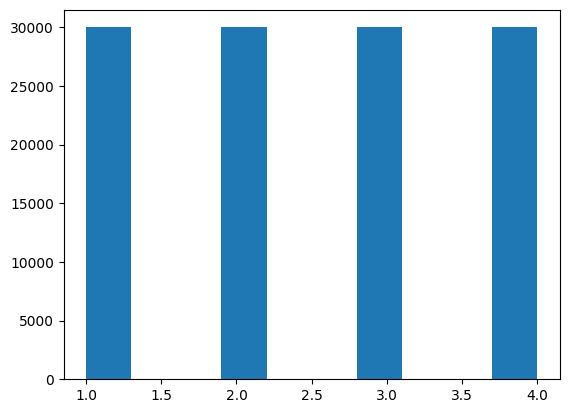

In [ ]:
labels = [s['label'] for s in train_iter]
import matplotlib.pyplot as plt
plt.hist(labels)

In [ ]:
import numpy as np
np.sqrt(30000) * 4

np.float64(692.8203230275509)

In [ ]:
train_iter[0]

{'label': 3,
 'title': 'Wall St. Bears Claw Back Into the Black (Reuters)',
 'description': "Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again."}

In [ ]:
!pip install torchtext==0.18.0 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [ ]:
!pip install torch==2.3.0 --force-reinstall

  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached typing_extensions-4.13.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.3.1-py3-none-any.whl.metadata (11 kB)
  Using cached MarkupSafe-3.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.0 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.2/779.2 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [ ]:
import torch
torch.__version__

'2.3.0+cu121'

In [ ]:
import torchtext

In [ ]:
from torchtext.data.utils import get_tokenizer
from collections import Counter
from torchtext.vocab import vocab

tokenizer = get_tokenizer('basic_english')
counter = Counter()
for t in train_iter:
    label, title, line = t['label'], t['title'], t['description']
    counter.update(tokenizer(f'{title}. {line}'))
vocab = vocab(counter, min_freq=1)

/usr/local/lib/python3.11/dist-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.11/dist-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.11/dist-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated

In [ ]:
text_pipeline = lambda x: [vocab[token] for token in tokenizer(x)]
label_pipeline = lambda x: int(x) - 1

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from itertools import product
import numpy as np


class TextDataset(torch.utils.data.Dataset):
  def __init__(self, data_iter, size):
    super().__init__()
    self.labels = []
    self.texts = []
    for t in data_iter:
      _label, _text = t['label'], ' '.join([t['title'], t['description']])
      self.labels.append(label_pipeline(_label))
      self.texts.append(_text)

    sss = StratifiedShuffleSplit(n_splits=1, train_size=size, random_state=42)
    trix, valix = next(sss.split(self.texts, self.labels))

    self.labels = np.array(self.labels)
    self.texts = np.array(self.texts)

    data = tuple(self.labels[trix] == l for l in range(self.labels.max() + 1))
    res = []
    resy = []
    for i in range(len(data)):
      for j in range(i + 1, len(data)):
        for sk, sl in product(self.texts[trix][data[i]], self.texts[trix][data[j]]):
          res.append(' '.join([sk, sl]))
          resy.append(np.random.choice([i, j]))
    self.texts, self.labels = np.concat([self.texts, res]), np.concat([self.labels, np.array(resy)])


  def __len__(self):
    return len(self.labels)

  def __getitem__(self, idx):
    return self.texts[idx], self.labels[idx]

In [ ]:
class TextDataset2(torch.utils.data.Dataset):
  def __init__(self, data_iter, size):
    super().__init__()
    self.labels = []
    self.texts = []
    for t in data_iter:
      _label, _text = t['label'], ' '.join([t['title'], t['description']])
      self.labels.append(label_pipeline(_label))
      self.texts.append(_text)

    self.labels = np.array(self.labels)
    self.texts = np.array(self.texts)

  def __len__(self):
    return len(self.labels)

  def __getitem__(self, idx):
    return self.texts[idx], self.labels[idx]

(array([1900.,    0.,    0., 1900.,    0.,    0., 1900.,    0.,    0.,
        1900.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

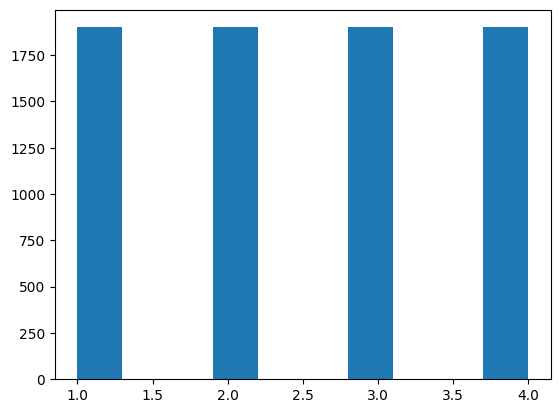

In [ ]:
test_iter = load_dataset("sh0416/ag_news", split='test')
labels = [s['label'] for s in test_iter]
import matplotlib.pyplot as plt
plt.hist(labels)

In [ ]:
train_dataset = TextDataset(train_iter, 700)
test_dataset = TextDataset(test_iter, 160)

In [ ]:
len(train_dataset), len(test_dataset)

(303750, 17200)

In [ ]:
train_dataset[0], test_dataset[0]

((np.str_("Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again."),
  np.int64(2)),
 (np.str_("Fears for T N pension after talks Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul."),
  np.int64(2)))

In [ ]:
text_pipeline('here is the an example')

[879, 179, 7, 92, 2521]

In [ ]:
from torch.utils.data import DataLoader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def collate_batch(batch):
    label_list, text_list, offsets, ix = [], [], [0], []
    for i, t in enumerate(batch):
        try:
            _label, _text = int(t[1]), str(t[0])
            label_list.append(_label)
            processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
            text_list.append(processed_text)
            offsets.append(processed_text.size(0))
            ix.append(i)
        except:
            continue
    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    text_list = torch.cat(text_list)

    return label_list.to(device), text_list.to(device), offsets.to(device), torch.tensor(ix, dtype=torch.int64).to(device)

dataloader = DataLoader(train_dataset, batch_size=8, shuffle=False, collate_fn=collate_batch)

In [ ]:
from torch import nn

class TextClassificationModel(nn.Module):

    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=False)
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        return self.fc(embedded)

In [ ]:
next(iter(dataloader))

<class 'list'> (np.str_("Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again."), np.int64(2))


(tensor([2, 2, 2, 2, 2, 2, 2, 2]),
 tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  10,  12,
          13,  14,   0,  15,  16,  17,  18,  19,  20,  14,  21,  22,  23,  24,
           2,  25,  26,  27,  28,  29,   9,  10,  11,  10,  12,  30,  31,  32,
          25,  33,  14,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
           7,  45,  46,  14,  35,  47,  48,  49,  50,  51,  52,  19,   7,  53,
           2,  54,  41,  55,  56,  57,  16,  58,   9,  10,  11,  10,  12,  59,
          60,  61,  62,  63,   7,  55,  41,   7,  58,  38,  64,  21,  65,  66,
          67,   7,  68,  53,  69,  70,  71,   7,  72,  19,  73,  74,   2,  75,
          76,  54,  77,  78,  79,  80,  81,   9,  10,  11,  10,  12,  82,  83,
          84,  54,  85,  78,   7,  79,  81,  44,  80,  75,  86,  87,  36,  88,
          89,  90,  91,  14,  92,  54,  93,  94,  50,  95,   2,  54,  61,  96,
          97,  98,  99,  14, 100, 101, 102,  97, 103,  55,   9, 104,  11, 104,
          12, 105

In [ ]:
num_class = len(set([t['label'] for t in train_iter]))
vocab_size = len(vocab)
emsize = 64
model = TextClassificationModel(vocab_size, emsize, num_class).to(device)

In [ ]:
import time

def train(dataloader):
    model.train()
    total_acc, total_count = 0, 0
    log_interval = 500
    start_time = time.time()

    for idx, (label, text, offsets) in enumerate(dataloader):
        optimizer.zero_grad()
        predited_label = model(text, offsets)
        loss = criterion(predited_label, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
        optimizer.step()
        total_acc += (predited_label.argmax(1) == label).sum().item()
        total_count += label.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches '
                  '| accuracy {:8.3f}'.format(epoch, idx, len(dataloader),
                                              total_acc/total_count))
            total_acc, total_count = 0, 0
            start_time = time.time()

def evaluate(dataloader):
    model.eval()
    total_acc, total_count = 0, 0

    with torch.no_grad():
        for idx, (label, text, offsets, ix) in enumerate(dataloader):
            predited_label = model(text, offsets)
            loss = criterion(predited_label, label[ix])
            total_acc += (predited_label.argmax(1) == label[ix]).sum().item()
            total_count += label[ix].size(0)
    return total_acc/total_count

In [ ]:
# With shuffled samples

from torch.utils.data.dataset import random_split
# Hyperparameters
EPOCHS = 10 # epoch
LR = 5  # learning rate
BATCH_SIZE = 64 # batch size for training

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
total_accu = None

num_train = int(len(train_dataset) * 0.95)
split_train_, split_valid_ = \
    random_split(train_dataset, [num_train, len(train_dataset) - num_train])

train_dataloader = DataLoader(split_train_, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)
valid_dataloader = DataLoader(split_valid_, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE,
                             shuffle=True, collate_fn=collate_batch)

for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train(train_dataloader)
    accu_val = evaluate(valid_dataloader)
    if total_accu is not None and total_accu > accu_val:
      scheduler.step()
    else:
       total_accu = accu_val
    print('-' * 59)
    print('| end of epoch {:3d} | time: {:5.2f}s | '
          'valid accuracy {:8.3f} '.format(epoch,
                                           time.time() - epoch_start_time,
                                           accu_val))
    print('-' * 59)

| epoch   1 |   500/ 4509 batches | accuracy    0.484
| epoch   1 |  1000/ 4509 batches | accuracy    0.610
| epoch   1 |  1500/ 4509 batches | accuracy    0.633
| epoch   1 |  2000/ 4509 batches | accuracy    0.641
| epoch   1 |  2500/ 4509 batches | accuracy    0.647
| epoch   1 |  3000/ 4509 batches | accuracy    0.646
| epoch   1 |  3500/ 4509 batches | accuracy    0.645
| epoch   1 |  4000/ 4509 batches | accuracy    0.645
| epoch   1 |  4500/ 4509 batches | accuracy    0.645
-----------------------------------------------------------
| end of epoch   1 | time: 120.91s | valid accuracy    0.646 
-----------------------------------------------------------
| epoch   2 |   500/ 4509 batches | accuracy    0.657
| epoch   2 |  1000/ 4509 batches | accuracy    0.654
| epoch   2 |  1500/ 4509 batches | accuracy    0.656
| epoch   2 |  2000/ 4509 batches | accuracy    0.655
| epoch   2 |  2500/ 4509 batches | accuracy    0.655
| epoch   2 |  3000/ 4509 batches | accuracy    0.652
| epoch 

In [ ]:
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE,
                             shuffle=True, collate_fn=collate_batch)
evaluate(test_dataloader)

0.6834170854271356

In [ ]:
test_dataset2 = TextDataset2(test_iter, 0)
test_dataloader2 = DataLoader(test_dataset2, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
evaluate(test_dataloader2)

0.9041884816753927

In [ ]:
from torch.utils.data.dataset import random_split
# Hyperparameters
EPOCHS = 10 # epoch
LR = 5  # learning rate
BATCH_SIZE = 64 # batch size for training

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
total_accu = None
train_iter, test_iter = load_dataset("sh0416/ag_news", split='train'), load_dataset("sh0416/ag_news", split='test')

# tokenizer = get_tokenizer('basic_english')
# counter = Counter()
# for t in train_iter:
#     label, title, line = t['label'], t['title'], t['description']
#     counter.update(tokenizer(f'{title}. {line}'))
# vocab = vocab(counter, min_freq=1)

train_dataset = list(train_iter)
test_dataset = list(test_iter)
num_train = int(len(train_dataset) * 0.95)
split_train_, split_valid_ = \
    random_split(train_dataset, [num_train, len(train_dataset) - num_train])

train_dataloader = DataLoader(split_train_, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)
valid_dataloader = DataLoader(split_valid_, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE,
                             shuffle=True, collate_fn=collate_batch)

for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train(train_dataloader)
    accu_val = evaluate(valid_dataloader)
    if total_accu is not None and total_accu > accu_val:
      scheduler.step()
    else:
       total_accu = accu_val
    print('-' * 59)
    print('| end of epoch {:3d} | time: {:5.2f}s | '
          'valid accuracy {:8.3f} '.format(epoch,
                                           time.time() - epoch_start_time,
                                           accu_val))
    print('-' * 59)

| epoch   1 |   500/ 1782 batches | accuracy    0.670
| epoch   1 |  1000/ 1782 batches | accuracy    0.849
| epoch   1 |  1500/ 1782 batches | accuracy    0.874
-----------------------------------------------------------
| end of epoch   1 | time: 42.35s | valid accuracy    0.884 
-----------------------------------------------------------
| epoch   2 |   500/ 1782 batches | accuracy    0.894
| epoch   2 |  1000/ 1782 batches | accuracy    0.897
| epoch   2 |  1500/ 1782 batches | accuracy    0.901
-----------------------------------------------------------
| end of epoch   2 | time: 48.42s | valid accuracy    0.891 
-----------------------------------------------------------
| epoch   3 |   500/ 1782 batches | accuracy    0.914
| epoch   3 |  1000/ 1782 batches | accuracy    0.912
| epoch   3 |  1500/ 1782 batches | accuracy    0.911
-----------------------------------------------------------
| end of epoch   3 | time: 42.08s | valid accuracy    0.887 
-------------------------------

In [ ]:
len(vocab)

95810